This is a script attempting to optimize the return of investment (ROI) on the equality portfolio.

Please Input the Total of Investment: 340000
Please Input the Number of Assets: 4
Please Input the Symbol of Equalities: fb
Please Input the Symbol of Equalities: mpc
Please Input the Symbol of Equalities: aapl
Please Input the Symbol of Equalities: nflx

Current Portfolio Amount: $340000
The Number of Equalities: 4

Current Equalities: 
FB
MPC
AAPL
NFLX


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


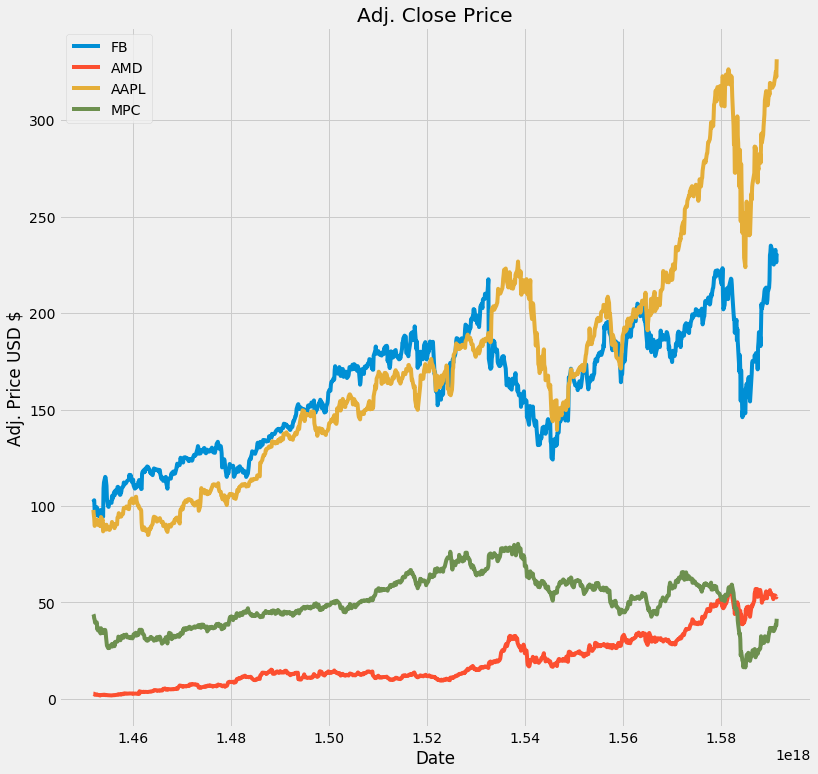

Optimazation Parameters and Shares Allocation

OrderedDict([('FB', 0.01289), ('AMD', 0.42213), ('AAPL', 0.56499), ('MPC', 0.0)])
Expected annual return: 55.5%
Annual volatility: 37.8%
Sharpe Ratio: 1.42

Shares Allocation: {'FB': 19.0, 'AMD': 2703.0, 'AAPL': 579.0, 'MPC': 2.0}
Funds Remaining: $64.45


In [14]:
# Import python libraries
import os
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import yfinance as yf
from pypfopt import EfficientFrontier, risk_models, expected_returns
plt.style.use("fivethirtyeight")


# User's input total investment amount, number of assests and assest symbols

# Total investment amount

total_investment = int(input("Please Input the Total of Investment: "))
n_asset = int(input("Please Input the Number of Assets: "))
assets = [str(input("Please Input the Symbol of Equalities: ")).upper() for i in range(n_assest)]

print("\nCurrent Portfolio Amount: " + "$" + str(total_investment))
print("The Number of Equalities: " + str(n_asset) + '\n')
print("Current Equalities: ") 
[print(asset) for asset in assets]
print('\n')

# obtaining historical price

# choosing date to retrieve historical price
startDate = "2016-01-01"
endDate = datetime.today().strftime("%Y-%m-%d")

df = pd.DataFrame()
                                    
for assest in assests:
    # retrieving historical price from yahoo finance and return the adje                               
    df[assest] = yf.download(assest, startDate, endDate)['Adj Close']
    
fig, ax = plt.subplots(figsize=(12, 12))

ax = plt.gca()
title = 'Adj. Close Price'

for sym in list(df.columns):
    plt.plot(df[sym], label = sym)


ax.set(xlabel="Date",
       ylabel="Adj. Price USD $",
       title = title)
plt.legend(list(df.columns), loc = 'upper left')
plt.show()

# Portfolio Optimization for Each Assest

# Expected returns and annualized sample covariance matrix

mu = expected_returns.mean_historical_return(df)
S = risk_models.sample_cov(df)

# Optimizing for max sharpe ratio based on volatility 
ef = EfficientFrontier(mu, S)
weights = ef.max_sharpe()
cleaned_weights = ef.clean_weights()

print("Optimazation Parameters and Shares Allocation\n")
print(cleaned_weights)
ef.portfolio_performance(verbose = True)

# Allocating numbers of shares for each assest

from pypfopt import DiscreteAllocation, get_latest_prices

latest_prices = get_latest_prices(df)
weights = cleaned_weights
da = DiscreteAllocation(weights, latest_prices, total_portfolio_value = total_investment)

allocation, leftover = da.lp_portfolio() # creating variables, allocation and leftover

print('\nShares Allocation:', allocation)
print('Funds Remaining: ${:.2f}'.format(leftover))



